**By Berin Güler**

We are preparing our enviroment and libraries that we will use.

In [1]:
from google.colab import files
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

Getting Data Set From Kaggle https://www.kaggle.com/competitions/dog-breed-identification/data

In [2]:
! pip install -q kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"beringler","key":"978c1154c74874c8e013ad04b8ab4fbf"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                           Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          12734        374  1.0              
zusmani/petrolgas-prices-worldwide                                 Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33           1192         72  1.0              
ruchi798/data-science-job-salaries                                 Data Science Job Salaries                             7KB  2022-06-15 08:59:12           2035         71  1.0              
devansodariya/student-performance-data       

In [8]:
! kaggle competitions download -c 'dog-breed-identification'

 99% 681M/691M [00:19<00:00, 35.4MB/s]
100% 691M/691M [00:20<00:00, 36.2MB/s]


In [9]:
! unzip dog-breed-identification.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/train/840dbad5a691c22611d85b2488bf

Now this is the time for EDA.

In [10]:
cd train/

/content/train


In [11]:
labels= pd.read_csv("labels.csv")
print(labels.shape)
labels.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [12]:
typ = labels["breed"]
typ_count = typ.value_counts()
typ_count.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [13]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [14]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [15]:
sample= pd.read_csv("sample_submission.csv")

In [16]:
sample.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


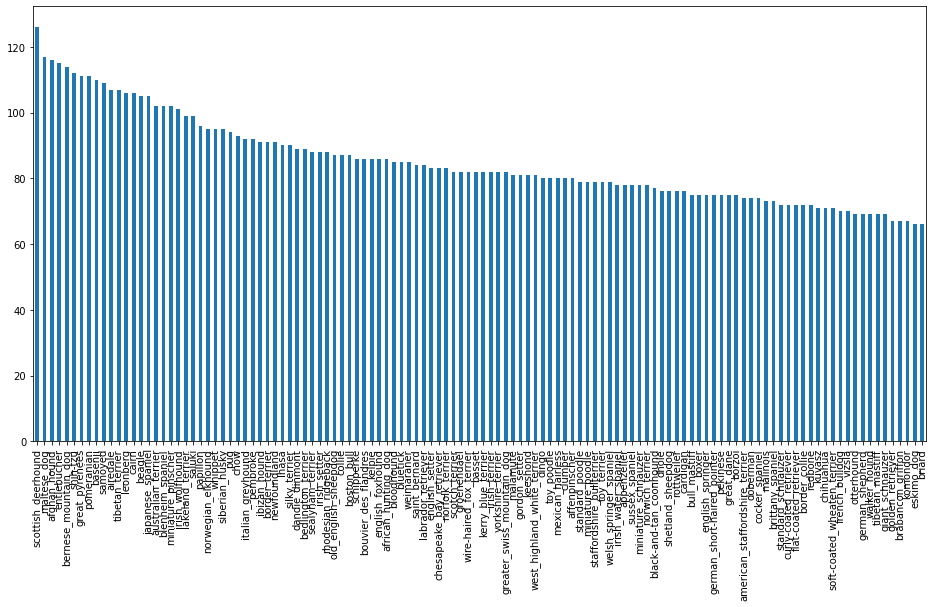

In [17]:
labels['breed'].value_counts().plot.bar(figsize=(16, 8))

I will work with top 3 breed due to computer enviroment limits.





In [18]:

CLASS_NAMES = ['scottish_deerhound','maltese_dog','afghan_hound']
labels = labels[(labels['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,146,0379145880ad3978f9b80f0dc2c03fba,afghan_hound


In [19]:
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)
for i in tqdm(range(len(labels))):
    img = image.load_img('train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 359/359 [00:01<00:00, 191.24it/s]


Train Images shape:  (359, 224, 224, 3)  size: 54,039,552
One-hot encoded output shape:  (359, 3)  size: 1,077


I will try 2 different model. 

In [20]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0

In [21]:

X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [33]:
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val))

Epoch 1/100
3/3 [==============================] - 36s 10s/step - loss: 4.2951 - accuracy: 0.4225 - val_loss: 4.3076 - val_accuracy: 0.2000
Epoch 2/100
3/3 [==============================] - 34s 9s/step - loss: 4.2672 - accuracy: 0.4302 - val_loss: 4.2859 - val_accuracy: 0.2462
Epoch 3/100
3/3 [==============================] - 35s 9s/step - loss: 4.2397 - accuracy: 0.4612 - val_loss: 4.2494 - val_accuracy: 0.2462
Epoch 4/100
3/3 [==============================] - 34s 9s/step - loss: 4.2115 - accuracy: 0.4612 - val_loss: 4.2270 - val_accuracy: 0.2462
Epoch 5/100
3/3 [==============================] - 39s 12s/step - loss: 4.1924 - accuracy: 0.4496 - val_loss: 4.2034 - val_accuracy: 0.2154
Epoch 6/100
3/3 [==============================] - 35s 9s/step - loss: 4.1593 - accuracy: 0.4341 - val_loss: 4.1842 - val_accuracy: 0.2000
Epoch 7/100
3/3 [==============================] - 33s 9s/step - loss: 4.1300 - accuracy: 0.4186 - val_loss: 4.1656 - val_accuracy: 0.2154
Epoch 8/100
3/3 [========

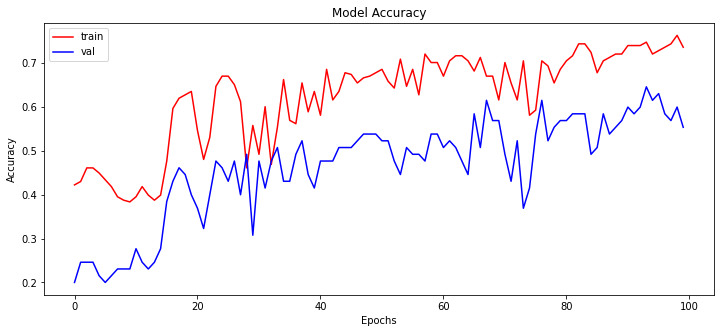

In [34]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [35]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 1s 151ms/step - loss: 2.7641 - accuracy: 0.7222
Accuracy over the test set: 
  72.22 %


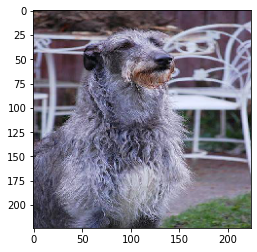

Originally :  maltese_dog
Predicted :  maltese_dog


In [42]:

plt.imshow(X_test[7,:,:,:])
plt.show()

print("Originally : ",labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])

In [40]:
model.save("dogpre.h5")